In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Model, load_model
from castor import director

Using TensorFlow backend.


In [3]:
%matplotlib inline
sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = (16, 9)
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams["image.cmap"] = "jet"

In [4]:
loss, acc, val_loss, val_acc = np.loadtxt("pollux.out", unpack=True)

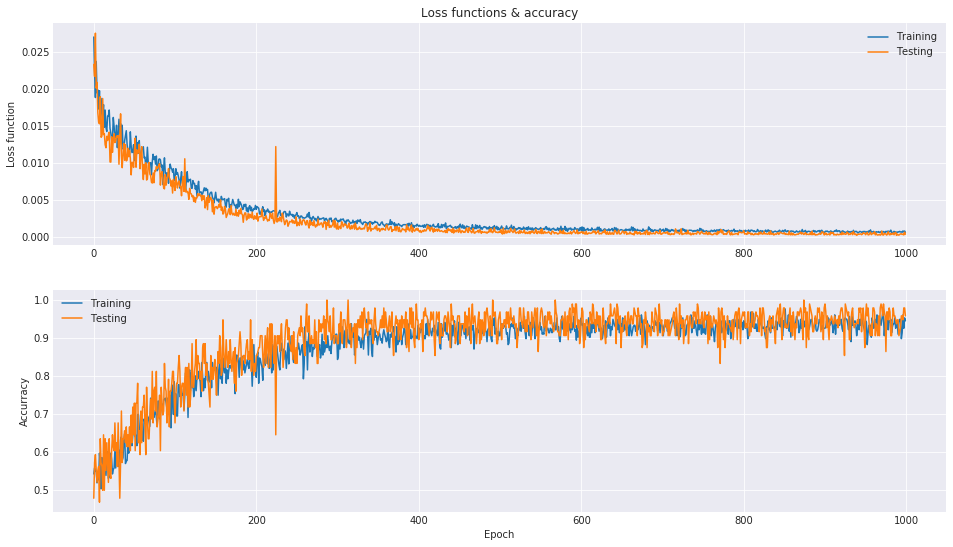

In [5]:
plt.subplot(2, 1, 1)
plt.title("Loss functions & accuracy")
plt.ylabel("Loss function")
plt.plot(loss, label="Training")
plt.plot(val_loss, label="Testing")
plt.legend(); plt.grid(True)

plt.subplot(2, 1, 2)
plt.xlabel("Epoch")
plt.ylabel("Accurracy")
plt.plot(acc, label="Training")
plt.plot(val_acc, label="Testing")
plt.legend(); plt.grid(True)

In [6]:
MODEL = load_model("pollux.hdf5")

In [7]:
for X, Y in director("pollux"):
    if np.random.randint(101) == 8:
        break

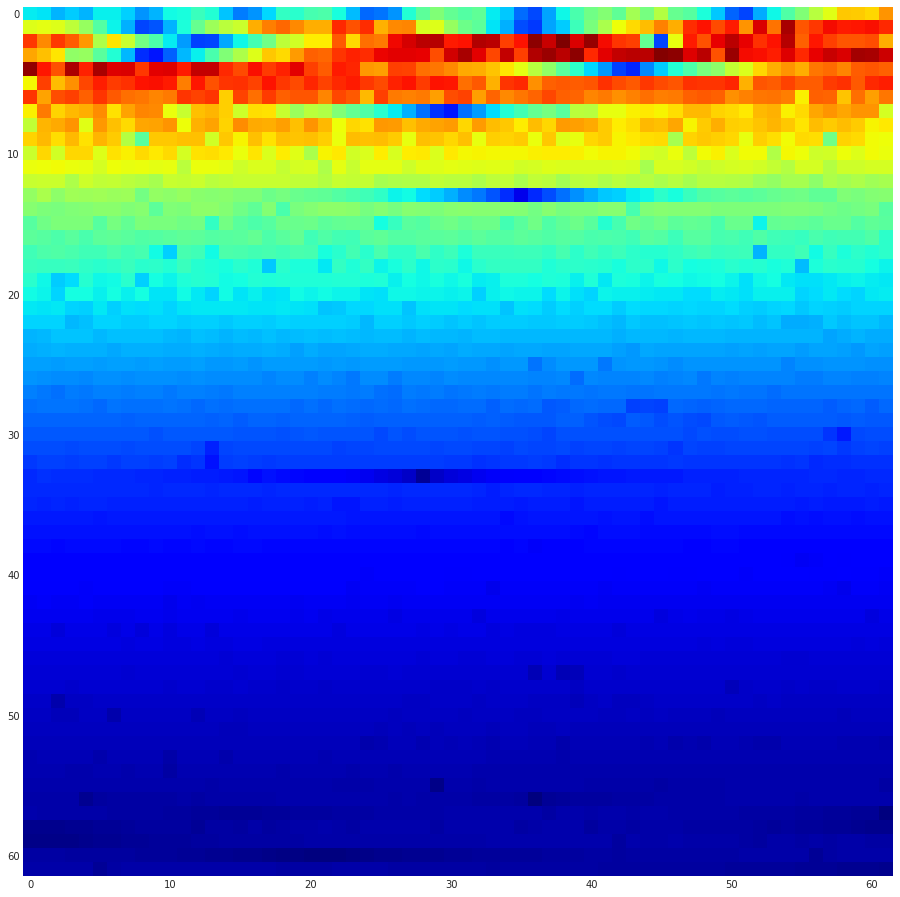

In [8]:
plt.figure(figsize=(16,16))
plt.imshow(X[0,:,:,0])
plt.grid(False)

In [9]:
def feature(layer):
    mydel = Model(MODEL.input, MODEL.get_layer(layer).output)
    myfet = mydel.predict(X)
    _, _, _, x = myfet.shape
    y = x // 4
    plt.figure(figsize=(16,16/5*y))
    for i in range(y):
        for j in range(4):
            n = i*4+j
            plt.subplot(y, 4, 1+n)
            plt.xticks([])
            plt.yticks([])
            plt.imshow(myfet[0,:,:,n])
            plt.grid(False)
            plt.colorbar()

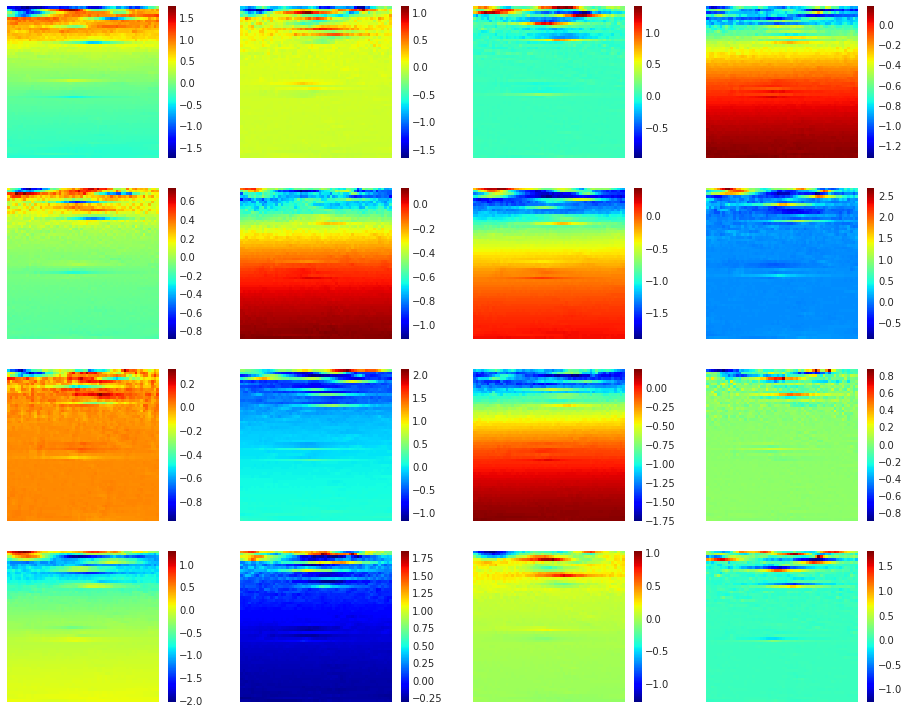

In [10]:
feature("Conv1")

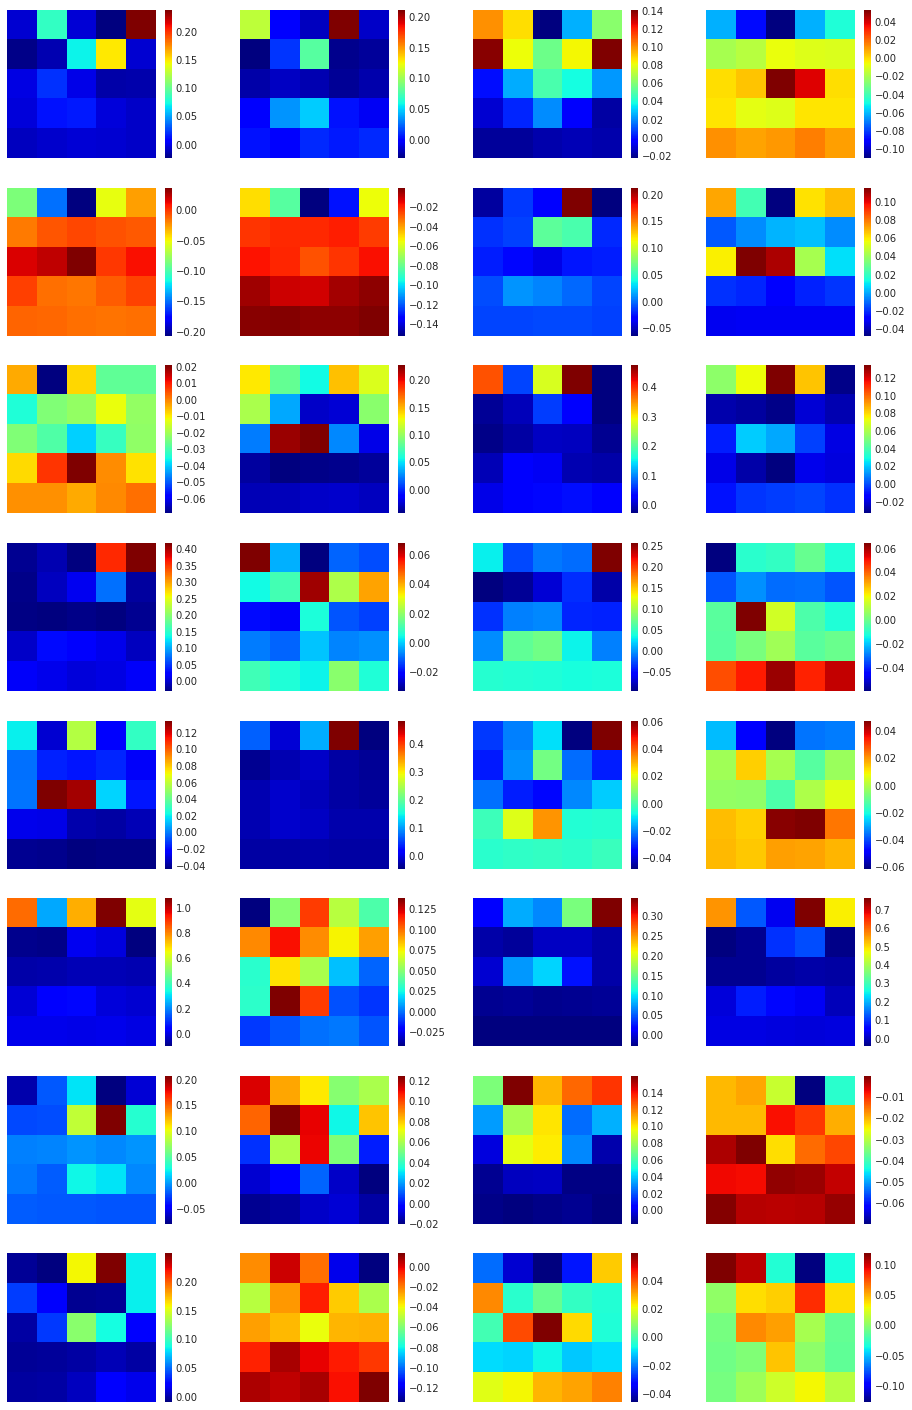

In [11]:
feature("Max2")

In [12]:
def filters(N):
    W = MODEL.get_weights()
    x, y, s, v = W[N].shape
    plt.figure(figsize=(16,16/s*v))
    for i in range(v):
        for j in range(s):
            n = i*s+j
            plt.subplot(v, s, 1+n)
            plt.xticks([])
            plt.yticks([])
            plt.imshow(W[N][:,:,j,i],
                       interpolation="quadric")
    plt.grid(False)

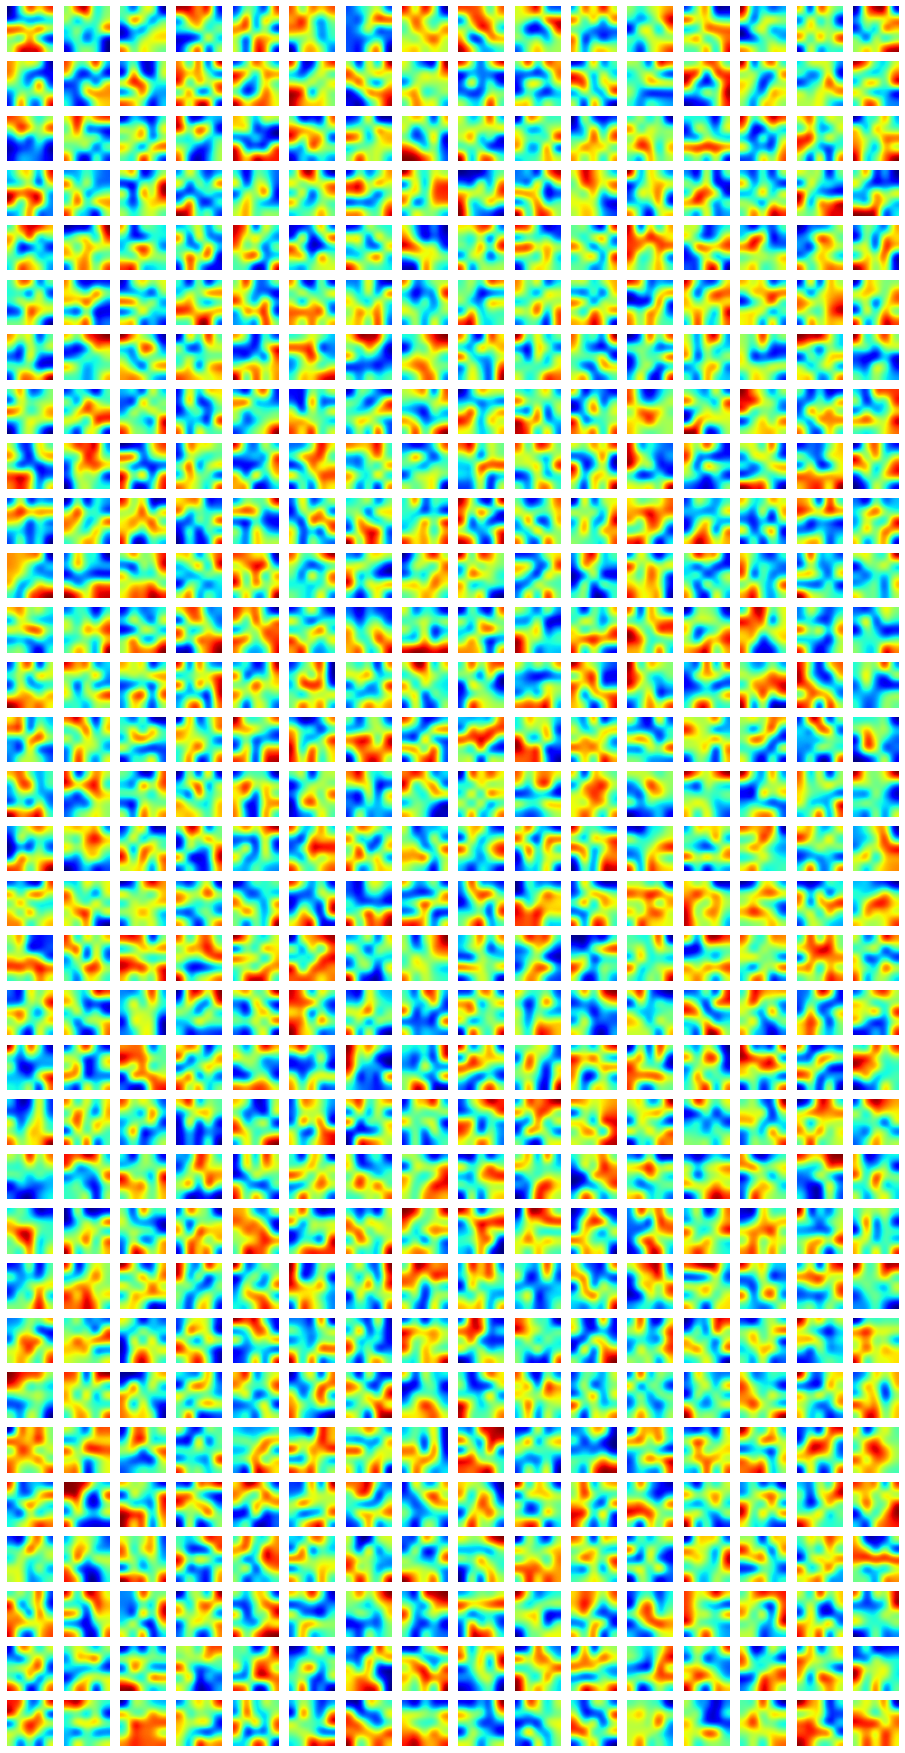

In [13]:
filters(2)

In [14]:
OUTFIT = np.load("pollux.npy")
scaler = MinMaxScaler().fit(OUTFIT)
OUTPUT = scaler.transform(OUTFIT)
PREDIC = MODEL.predict_generator(director("pollux"), steps=len(OUTPUT))

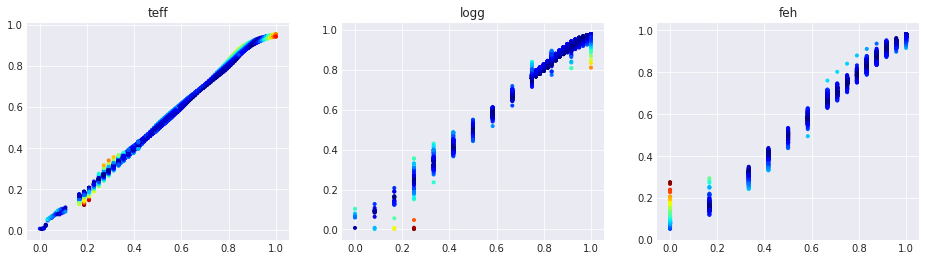

In [15]:
tip = ["teff", "logg", "feh"]
plt.figure(figsize=(16,4))
for i, name in enumerate(tip):
    plt.subplot(131+i)
    plt.title(name)
    plt.scatter(OUTPUT[:,i], PREDIC[:,i], s=9,
                    c=np.abs(PREDIC[:,i] - OUTPUT[:,i]))

In [16]:
TRANSF = scaler.inverse_transform(PREDIC)
ERRORF = np.sqrt((PREDIC[:,0]-OUTPUT[:,0])**2
               + (PREDIC[:,1]-OUTPUT[:,1])**2)

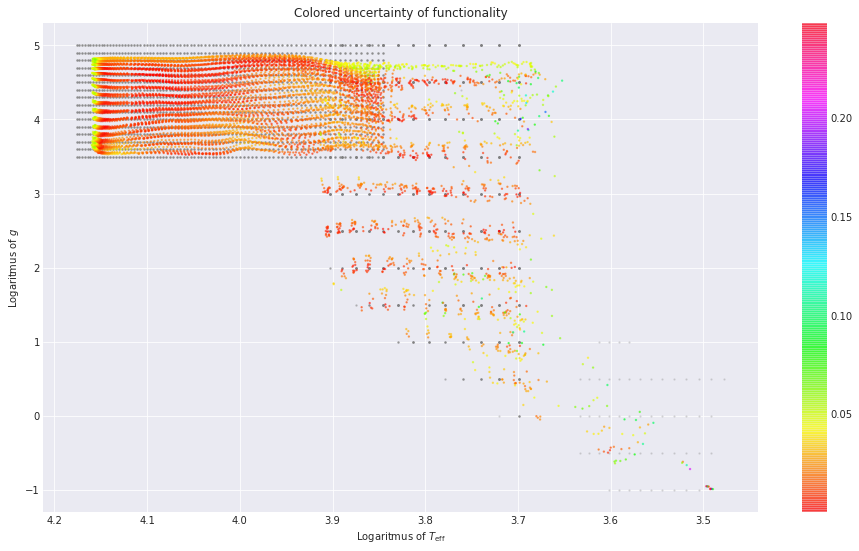

In [17]:
plt.title("Colored uncertainty of functionality")
plt.xlabel("Logaritmus of $T_\mathrm{eff}$")
plt.ylabel("Logaritmus of $g$")
plt.scatter(np.log10(OUTFIT[:,0]), OUTFIT[:,1], s=2, alpha=0.2, c="gray")
plt.scatter(np.log10(TRANSF[:,0]), TRANSF[:,1], s=2, alpha=0.5, c=ERRORF, cmap="hsv")
plt.gca().invert_xaxis()
plt.colorbar();